In [1]:
import pandas as pd
import numpy as np
import load
import descriptions

In [30]:
#tables = load.all_tables()
zlookups = {}
for table_name in descriptions.zlookup_table_names:
    zlookups[table_name] = descriptions.load_zlookup_table(table_name)

In [17]:
zlookup_dicts = { 
    'av_patient': {
        "SEX":"SEX",
        "ETHNICITY":"ETHNICITY",
        "DEATHLOCATIONCODE":"DEATHLOCATION",
        "DEATHCAUSECODE_1A":"DEATHCAUSE",              
        "DEATHCAUSECODE_1B":"DEATHCAUSE",              
        "DEATHCAUSECODE_1C":"DEATHCAUSE",
        "DEATHCAUSECODE_2":"DEATHCAUSE",
        "DEATHCAUSECODE_UNDERLYING":"DEATHCAUSE",
        "NEWVITALSTATUS":"VITALSTATUS"
    },
    'av_tumour':  {
        "SITE_ICD10_O2":"ICDFULL",
        "SITE_ICD10_O2_3CHAR":"ICD3CHAR",
        "MORPH_ICD10_O2":"MORPHOLOGY",
        "BEHAVIOUR_ICD10_O2":"BEHAVIOUR",
        "STAGE_BEST":"STAGE",
        "GRADE":"GRADE",
        "SEX":"SEX",
        "CREG_CODE":"CREG",
        "ER_STATUS":"ERPRSTATUS",
        "PR_STATUS":"ERPRSTATUS",
        "HER2_STATUS":"ERPRSTATUS",
        "CANCERCAREPLANINTENT":"CANCERCAREPLANINTENT",
        "PERFORMANCESTATUS":"PERFORMANCE",
        "CNS":"CNS",
        "ACE27":"ACE27SCORE",
        "LATERALITY":"LATERALITY"
    },
    'sact_patient': {
    },
    'sact_tumour': {
        "CONSULTANT_SPECIALITY_CODE":"CONSULTANTSPECIALITY",
        "PRIMARY_DIAGNOSIS":"ICDFULL",
        "MORPHOLOGY_CLEAN":"HISTOLOGY"
    },
    'sact_regimen': {
        "INTENT_OF_TREATMENT":"REGIMENINTENT",
        "CLINICAL_TRIAL":"CLINICALTRIAL"
    },
    'sact_outcome': {
        "REGIMEN_OUTCOME_SUMMARY":"REGIMENOUTCOME"
    },
    'sact_cycle': {
        "PERF_STATUS_START_OF_CYCLE":"PERFORMANCE"
    },
    'sact_drug_detail': {
        "ADMINISTRATION_ROUTE":"ADMINISTRATIONROUTE"
    }
}

In [31]:
for table_name, table in tables.items():
    print('\n\n\n')
    print(table_name, len(table))
    zlookup_dict = zlookup_dicts[table_name]
    for column, zlookup_name in zlookup_dict.items():
        if not zlookup_name.lower() in ['histology', 'deathcause']:
            good = zlookups[zlookup_name.lower()].index
            all_cats = table[column].dtype.categories
            bad = set(all_cats).difference(set(good))
            count_nan = len(table) - table[column].count()
            count_bad = np.sum(table[column].isin(bad))
            print(column, bad, count_bad, count_nan)
            
        
        





av_patient 1322100
SEX set() 0 0
ETHNICITY set() 0 129851
DEATHLOCATIONCODE {'6'} 7146 991719
NEWVITALSTATUS {'Potential error: Px traced alive after DoDeath but <2m', 'Potential error iro DoDeath', 'Potential error: Px interacts after DoDeath', 'Potential error: Px diagnosed after DoDeath', 'Potential error: Px treated after DoDeath', 'Potential error: Px traced alive after DoDeath > 2m'} 31961 0




av_tumour 1402817
SITE_ICD10_O2 set() 0 514
SITE_ICD10_O2_3CHAR set() 0 461
MORPH_ICD10_O2 {'8083', 'erro', '8249', '9715', '8046'} 10822 513
BEHAVIOUR_ICD10_O2 {'XXX'} 78 407
STAGE_BEST set() 0 16
GRADE set() 0 62787
SEX set() 0 0
CREG_CODE set() 0 0
ER_STATUS {'Pm'} 460 1279117
PR_STATUS {'Pm'} 420 1323601
HER2_STATUS {'Pm'} 313 1294783
CANCERCAREPLANINTENT {'Zm', 'Cm'} 5019 986954
PERFORMANCESTATUS {'4m', '3m', '1m', '2m'} 6852 1021537
CNS {'99', 'Y3m', 'NIm', 'Y2m', 'Y4m', 'Y1m'} 142597 1032895
ACE27 {'3m', '1m', '2m'} 644 1296493
LATERALITY set() 0 35




sact_cycle 1462099
PERF_

6 is not a death location code    
potential errors: valid - but 179511 more not listed    
        
9715, 8046 listed (next to each other) in original histologylookup.sql but not in wolfbane. 8083, 8249 not in either. erro is error.    
XXX is clearly an error code      
all the ms    
     
perf status is just a mess.   
        
6, 7 not regimen outcome codes. N, A (esp. N) might have meaning but unknown. less 9 than expected   
    
M, T, R, 6, 7, 0 not regimen intent codes. a, c, p, d lower case of real codes. ?, maybe U are for unknowns.    
?, 99 for unknowns. NO for no. EE, 0, 3 no idea.   
    
I guess those codes just aren't in there    
Lower case c, A on the end, AML??, then just some codes that don't exist I guess

In [42]:
columns_names = []
total = []
nans = []
not_in_lookup = []
specified_unknown = []
good = []
for table_name, table in tables.items():
    zlookup_dict = zlookup_dicts[table_name]
    for column, zlookup_name in zlookup_dict.items():
        if not zlookup_name.lower() in ['histology', 'deathcause']:
            count_bad = table[column].count() - np.sum(table[column].isin(
                zlookups[zlookup_name.lower()].index))
        else:
            count_bad = 0
        columns_names.append(table_name+'.'+column)
        total.append(len(table))
        nans.append(len(table) - table[column].count())
        not_in_lookup.append(count_bad)
        specified_unknown.append(0)  # add this later
        good.append(table[column].count() - count_bad - 0)
df = pd.DataFrame([nans,not_in_lookup,specified_unknown,good],
                  index=["nans","not_in_lookup","specified_unknown","good"],
                  columns=columns_names)

/Users/katya/anaconda3/envs/simulacrum/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


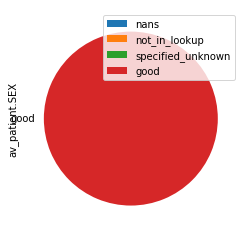

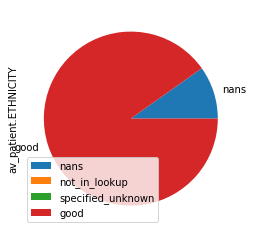

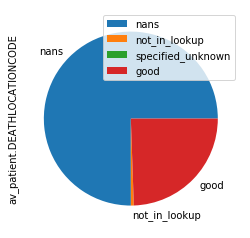

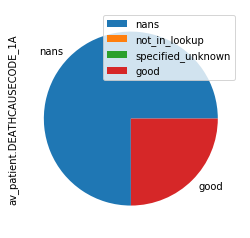

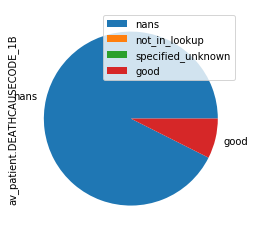

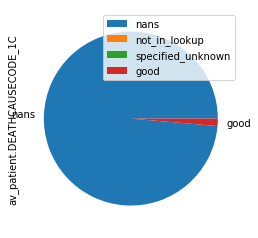

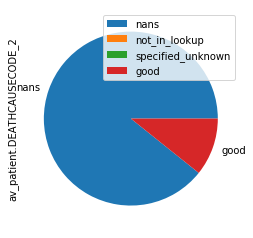

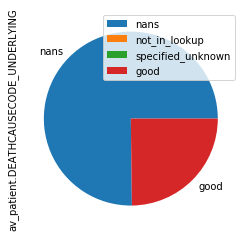

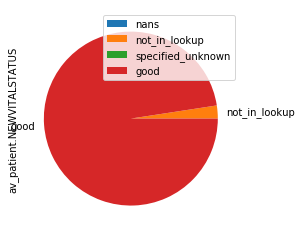

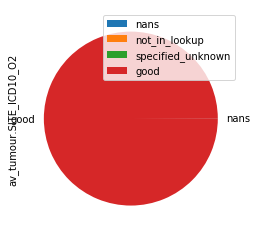

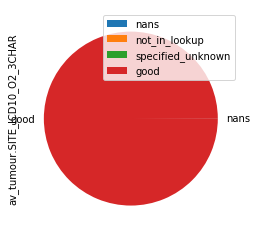

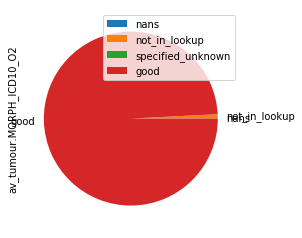

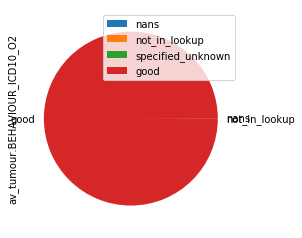

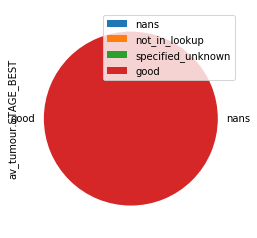

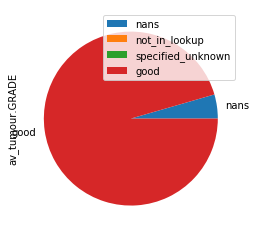

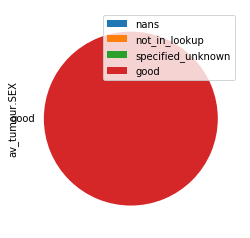

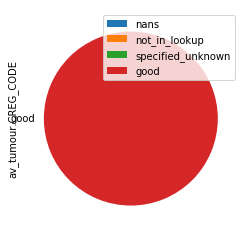

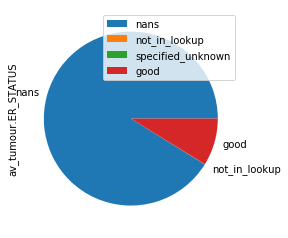

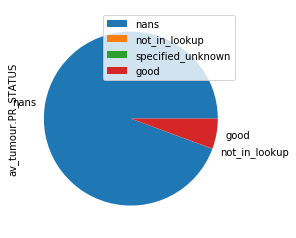

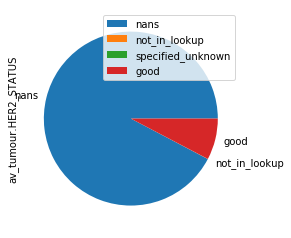

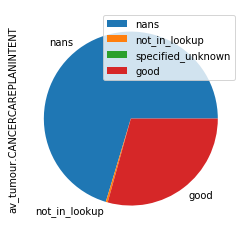

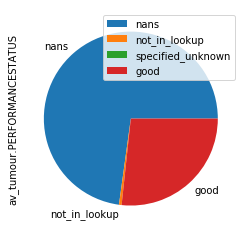

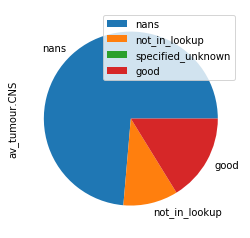

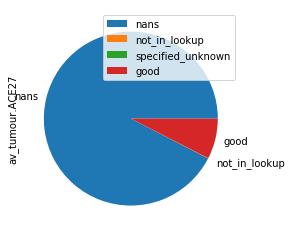

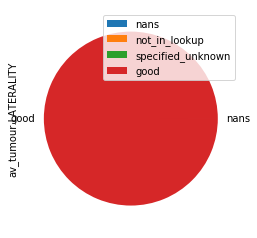

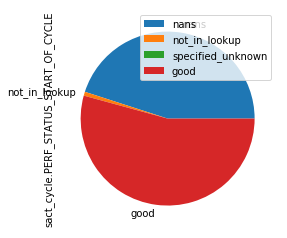

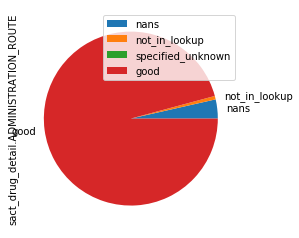

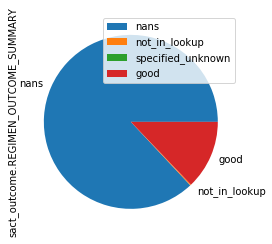

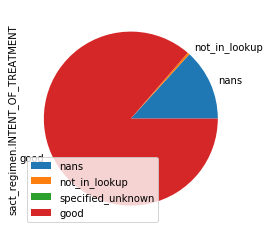

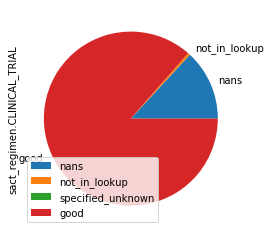

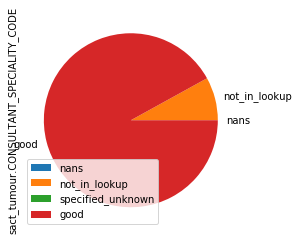

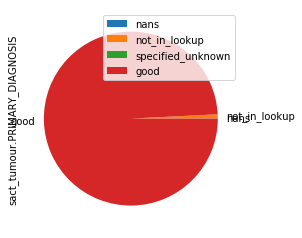

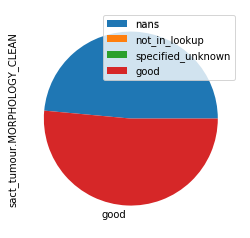

In [50]:
for col in columns_names:
    df.plot.pie(y=col)